In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mint_orders=pd.read_csv("/content/drive/MyDrive/Mint_orders1.csv")
customers=pd.read_csv("/content/drive/MyDrive/Mint_Customers.csv")


<ipython-input-2-271b46a93fc2>:1: DtypeWarning: Columns (19,37,40,48,51,69) have mixed types. Specify dtype option on import or set low_memory=False.
  mint_orders=pd.read_csv("/content/drive/MyDrive/Mint_orders1.csv")


# Data Cleaning and Preprocessing

##Orders

In [ ]:
mint_orders.shape

(39070, 74)

In [ ]:
#Drop columns that don't contribute to analysis
mint_orders.columns

Index(['Name', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Street', 'Billing Address1',
       'Billing Address2', 'Billing Company', 'Billing City', 'Billing Zip',
       'Billing Province', 'Billing Country', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Notes', 'Note Attributes', 'Cancelled at',
       'Payment Method', 'Payment Reference', 'Refunded Amount', 'Vendor',
       'Outstanding Balance', 'Employee', 'Location', 'Device ID', 'Id',
       'Tags', 'Ris

In [ ]:
mint_orders.drop(columns=['Currency','Lineitem sku','Lineitem fulfillment status','Lineitem taxable','Note Attributes','Payment Reference','Employee', 'Location', 'Device ID', 'Id',
       'Tags', 'Risk Level','Tax 2 Name', 'Tax 2 Value', 'Tax 3 Name', 'Tax 3 Value',
       'Tax 4 Name', 'Tax 4 Value', 'Tax 5 Name', 'Tax 5 Value', 'Phone',
       'Receipt Number', 'Duties','Payment ID', 'Payment Terms Name',
       'Next Payment Due At', 'Payment References','Lineitem compare at price','Notes','Billing Company'],inplace=True)

In [ ]:
mint_orders.shape

(39070, 44)

In [ ]:
#Consider only paid/refunded orders
mint_orders.dropna(subset=['Financial Status'],inplace=True)

In [ ]:
mint_orders.shape

(14713, 44)

In [ ]:
mint_orders['Paid at'].fillna(mint_orders['Created at'],inplace=True)

In [ ]:
mint_orders.isnull().sum()

Name                              0
Financial Status                  0
Paid at                           0
Fulfillment Status                0
Fulfilled at                     70
Accepts Marketing                 0
Subtotal                          0
Shipping                          0
Taxes                             0
Total                             0
Discount Code                 11714
Discount Amount                   0
Shipping Method                6870
Created at                        0
Lineitem quantity                 0
Lineitem name                     0
Lineitem price                    0
Lineitem requires shipping        0
Billing Street                 6677
Billing Address1               6677
Billing Address2              11484
Billing City                   6677
Billing Zip                    6677
Billing Province              10564
Billing Country                6677
Shipping Street                7313
Shipping Address1              7314
Shipping Address2           

In [ ]:
#Check for Duplicates
mint_orders[mint_orders.duplicated()]

Empty DataFrame
Columns: [Name, Financial Status, Paid at, Fulfillment Status, Fulfilled at, Accepts Marketing, Subtotal, Shipping, Taxes, Total, Discount Code, Discount Amount, Shipping Method, Created at, Lineitem quantity, Lineitem name, Lineitem price, Lineitem requires shipping, Billing Street, Billing Address1, Billing Address2, Billing City, Billing Zip, Billing Province, Billing Country, Shipping Street, Shipping Address1, Shipping Address2, Shipping Company, Shipping City, Shipping Zip, Shipping Province, Shipping Country, Cancelled at, Payment Method, Refunded Amount, Vendor, Outstanding Balance, Source, Lineitem discount, Tax 1 Name, Tax 1 Value, Billing Province Name, Shipping Province Name]
Index: []

[0 rows x 44 columns]

In [ ]:
mint_orders2=mint_orders.copy()

In [ ]:

#Text Cleaning
special_characters = r'[^\w\s\d,-]'


columns_to_clean = ['Billing Street','Billing City', 'Billing Zip','Shipping Street','Shipping City','Shipping Zip']
for column in columns_to_clean:

    mint_orders[column] = mint_orders[column].replace(special_characters, '', regex=True)
    mint_orders[column] = mint_orders[column].str.strip()
    mint_orders[column] = mint_orders[column].str.replace(r'\s*,\s*', ',', regex=True)
    mint_orders[column] = mint_orders[column].str.replace(r'(?<=\S)-(?=\S)', ' ', regex=True)
    mint_orders[column] = mint_orders[column].str.lower()

mint_orders['Billing Zip']=mint_orders['Billing Zip'].str.replace(r'\s', '')

mint_orders['Shipping Zip']=mint_orders['Shipping Zip'].str.replace(r'\s', '')

In [ ]:

mint_orders["Full Billing Address"]=mint_orders['Billing Street'].fillna('') + "," + \
                              mint_orders['Billing City'].fillna('') + "," + \
                              mint_orders['Billing Zip'].fillna('')
                              #mint_orders['Billing Province'].fillna('')
#mint_orders['Billing Address2'].fillna('') + ", " + \


In [ ]:
mint_orders[mint_orders['Name']=='#14475']

Name Financial Status                    Paid at Fulfillment Status  \
2889  #14475             paid  2023-03-06 20:24:44 +0000          fulfilled   

                   Fulfilled at Accepts Marketing  Subtotal  Shipping  Taxes  \
2889  2023-03-07 14:58:04 +0000               yes      33.0      15.0    8.0   

      Total  ... Refunded Amount       Vendor Outstanding Balance Source  \
2889   48.0  ...             0.0  Mint Plants                 0.0    web   

      Lineitem discount  Tax 1 Name  Tax 1 Value  Billing Province Name  \
2889                0.0  GB VAT 20%          8.0       Northern Ireland   

     Shipping Province Name                         Full Billing Address  
2889       Northern Ireland  16 broadway ballywater,newtownards,bt22 2nh  

[1 rows x 45 columns]

In [ ]:

mint_orders["Full Shipping Address"]=mint_orders['Shipping Street'].fillna('') + "," + \
                              mint_orders['Shipping City'].fillna('') + "," + \
                              mint_orders['Shipping Zip'].fillna('')

                              #mint_orders['Shipping Province'].fillna('')

#mint_orders['Shipping Address2'].fillna('') + ", " + \


In [ ]:
pattern = r'^[,\s]+$'
billing_contains_only_commas = mint_orders['Full Billing Address'].str.match(pattern)
billing_addresses_with_only_commas = mint_orders[billing_contains_only_commas]

In [ ]:
shipping_contains_only_commas = mint_orders['Full Shipping Address'].str.match(pattern)
shipping_addresses_with_only_commas = mint_orders[shipping_contains_only_commas]

In [ ]:
mint_orders['Full Address']=mint_orders['Full Shipping Address']
mint_orders.loc[billing_contains_only_commas & shipping_contains_only_commas, 'Full Address'] = 'No Address, Retail Order'
mint_orders.loc[shipping_contains_only_commas & ~billing_contains_only_commas , 'Full Address'] = mint_orders['Full Billing Address']

In [ ]:
mint_orders[mint_orders['Full Address']=='No Address, Retail Order']

Name Financial Status                    Paid at Fulfillment Status  \
850    #15364             paid  2023-10-04 16:36:19 +0100          fulfilled   
1653   #15035             paid  2023-06-02 11:26:09 +0100          fulfilled   
1662   #15031             paid  2023-05-27 15:59:20 +0100          fulfilled   
1663   #15030             paid  2023-05-27 15:54:55 +0100          fulfilled   
1665   #15029             paid  2023-05-27 15:47:55 +0100          fulfilled   
...       ...              ...                        ...                ...   
27788   #4804             paid  2021-04-07 13:41:59 +0100          fulfilled   
27791   #4802             paid  2021-04-07 13:33:13 +0100          fulfilled   
27792   #4801             paid  2021-04-07 13:30:08 +0100          fulfilled   
30430   #3943             paid  2020-12-15 16:24:32 +0000          fulfilled   
35541   #2176             paid  2020-06-12 12:33:08 +0100          fulfilled   

                    Fulfilled at Accepts Marketing  Subtotal  Shipping  Taxes  \
850    2023-10-04 16:36:19 +0100                no    398.00       0.0  66.33   
1653   2023-06-02 11:26:09 +0100               yes    100.00       0.0  16.67   
1662   2023-05-27 15:59:21 +0100               yes     20.00       0.0   3.33   
1663   2023-05-27 15:54:55 +0100               yes      7.25       0.0   1.21   
1665   2023-05-27 15:47:55 +0100               yes     10.00       0.0   1.67   
...                          ...               ...       ...       ...    ...   
27788  2021-04-07 13:41:58 +0100               yes      0.01       0.0   0.00   
27791  2021-04-07 13:33:12 +0100               yes      0.50       0.0   0.08   
27792  2021-04-07 13:30:08 +0100               yes      0.01       0.0   0.00   
30430  2020-12-15 16:24:31 +0000               yes     12.00       0.0   2.00   
35541  2020-06-12 12:33:07 +0100               yes      0.10       0.0   0.02   

        Total  ... Outstanding Balance  Source Lineitem discount  Tax 1 Name  \
850    398.00  ...                 0.0     pos              0.00  GB VAT 20%   
1653   100.00  ...                 0.0     pos              0.00  GB VAT 20%   
1662    20.00  ...                 0.0     pos              0.00  GB VAT 20%   
1663     7.25  ...                 0.0     pos              4.25  GB VAT 20%   
1665    10.00  ...                 0.0     pos              0.00  GB VAT 20%   
...       ...  ...                 ...     ...               ...         ...   
27788    0.01  ...                 0.0     pos              0.00  GB VAT 20%   
27791    0.50  ...                 0.0     pos              0.00  GB VAT 20%   
27792    0.01  ...                 0.0     pos              0.00  GB VAT 20%   
30430   12.00  ...                 0.0     pos              0.00  GB VAT 20%   
35541    0.10  ...                 0.0     pos              0.00     VAT 20%   

       Tax 1 Value Billing Province Name  Shipping Province Name  \
850          66.33                   NaN                     NaN   
1653         16.67                   NaN                     NaN   
1662          3.33                   NaN                     NaN   
1663          1.21                   NaN                     NaN   
1665          1.67                   NaN                     NaN   
...            ...                   ...                     ...   
27788         0.00                   NaN                     NaN   
27791         0.08                   NaN                     NaN   
27792         0.00                   NaN                     NaN   
30430         2.00                   NaN                     NaN   
35541         0.02                   NaN                     NaN   

       Full Billing Address Full Shipping Address              Full Address  
850                      ,,                    ,,  No Address, Retail Order  
1653                     ,,                    ,,  No Address, Retail Order  
1662                     ,,                    ,,  No Address, 

##Customers

In [ ]:
customers.shape

(7600, 15)

In [ ]:
customers.columns

Index(['Customer ID', 'Accepts Email Marketing', 'Default Address Address1',
       'Default Address Address2', 'Default Address City', 'Province',
       'Default Address Country Code', 'Default Address Zip', 'Phone',
       'Accepts SMS Marketing', 'Total Spent', 'Total Orders', 'Note',
       'Tax Exempt', 'Tags'],
      dtype='object')

In [ ]:
customers['Customer ID']=customers['Customer ID'].str.replace("'","")

In [ ]:
customers.drop(columns=['Phone','Tax Exempt','Note'],inplace=True)

In [ ]:
customers.isnull().sum()

Customer ID                        1
Accepts Email Marketing            1
Default Address Address1        1443
Default Address Address2        5236
Default Address City            1443
Province                        3805
Default Address Country Code    1207
Default Address Zip             1443
Accepts SMS Marketing              1
Total Spent                        1
Total Orders                       1
Tags                            4646
dtype: int64

In [ ]:
customers.dropna(subset=['Default Address Address1'],inplace=True)

In [ ]:
customers2=customers.copy()

In [ ]:
special_characters = r'[^\w\s\d,-]'

# Remove all special characters, leading & trailing spaces, space after commas, replace hyphen with space
columns_to_clean = ['Default Address Address1', 'Default Address Address2', 'Default Address City', 'Default Address Zip']
for column in columns_to_clean:

    customers[column] = customers[column].replace(special_characters, '', regex=True)
    customers[column] = customers[column].str.strip()
    customers[column] = customers[column].str.replace(r',\s+', ',', regex=True)
    customers[column] = customers[column].str.replace('-', ' ', regex=False)
    customers[column] = customers[column].str.lower()

customers['Default Address Zip']=customers['Default Address Zip'].str.replace(r'\s', '')

In [ ]:
#Join customer addresses
customers["Full Address"]=customers['Default Address Address1'].fillna('') + "," + \
                          customers.apply(lambda row: row['Default Address Address2'] + "," if pd.notnull(row['Default Address Address2']) else '', axis=1) +\
                          customers['Default Address City'].fillna('') + "," + \
                          customers['Default Address Zip'].fillna('')


In [ ]:
duplicate_rows = customers.duplicated(subset=['Full Address'])
customers=customers[~duplicate_rows]

In [ ]:
customers.shape

(5931, 13)

##Joining customers and Orders

In [ ]:
merged_orders=pd.merge(mint_orders, customers, how='left', on='Full Address')

In [ ]:
merged_orders.drop(columns=['Billing Address1',
       'Billing Address2', 'Billing City', 'Billing Zip', 'Billing Province',
       'Billing Country', 'Shipping Street', 'Shipping Address1',
       'Shipping Address2', 'Shipping Company', 'Shipping City',
       'Shipping Zip', 'Shipping Province', 'Shipping Country','Default Address Address1',
       'Default Address Address2', 'Default Address City',
       'Province', 'Default Address Country Code',
       'Default Address Zip'],inplace=True)

In [ ]:
merged_orders.columns

Index(['Name', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Subtotal', 'Shipping', 'Taxes',
       'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem requires shipping', 'Billing Street', 'Cancelled at',
       'Payment Method', 'Refunded Amount', 'Vendor', 'Outstanding Balance',
       'Source', 'Lineitem discount', 'Tax 1 Name', 'Tax 1 Value',
       'Billing Province Name', 'Shipping Province Name',
       'Full Billing Address', 'Full Shipping Address', 'Full Address',
       'Customer ID', 'Accepts Email Marketing', 'Accepts SMS Marketing',
       'Total Spent', 'Total Orders', 'Tags'],
      dtype='object')

In [ ]:
merged_orders.shape

(14713, 39)

In [ ]:
nulls= merged_orders[merged_orders['Customer ID'].isnull()]

In [ ]:
merged_orders['Customer ID'].isnull().sum()

8168

In [ ]:
null_address_counts = nulls['Full Address'].value_counts()

In [ ]:
null_address_counts

Full Address
No Address, Retail Order                              6646
ground floor flat,278 hotwell road,bristol,bs8 4nj      14
3 mays close,coalpit heath,bristol,bs36 2xb             14
5 pine close,thornbury,bristol,bs35 2js                 14
flat 8,cedar court,glavanon park,bristol,bs91rl         13
                                                      ... 
11 perry street,perry street,saint judes,bs5 0sy         1
43 dunster road,keynsham,bs31 1wb                        1
11 torrance close,bristol,bs30 5lh                       1
coombe,wotton,shasta cottage,coombe,gl12 7nd             1
51,roman grove,portchester,fareham,po16 9ln              1
Name: count, Length: 1113, dtype: int64

In [ ]:
null_address_counts_gt1 = null_address_counts[(null_address_counts>3)]

In [ ]:
null_address_counts_gt1

Full Address
No Address, Retail Order                                 6646
ground floor flat,278 hotwell road,bristol,bs8 4nj         14
3 mays close,coalpit heath,bristol,bs36 2xb                14
5 pine close,thornbury,bristol,bs35 2js                    14
flat 8,cedar court,glavanon park,bristol,bs91rl            13
154 ratcliffe court,chimney steps,bristol,bs20fe           12
50 woodlands road,charfield,wotton under edge,gl128ls      10
110 somerset road,knowle,bristol,bs42jb                     8
17 chapel hill,clevedon,bs217nl                             8
20 ingmire road,bristol,bs56xd                              7
32 hudson close,bristol,bs37 4np                            7
71 kensal green drive,maidenhead,sl67ra                     6
64 parklands,wotton under edge,gl12 7nr                     6
48a,northover road,bristol,bs9 3lj                          6
194 whitehall road,bristol,bs5 9bp                          6
7 reynolds close,wotton under edge,gl127ny               

#Descriptive Analysis

## Numbers at a glance

In [ ]:
print("Total Revenue:",mint_orders['Total'].sum())
print("Shipping costs:" ,mint_orders['Shipping'].sum())
print("Taxes:",mint_orders['Taxes'].sum())

Total Revenue: 401842.95
Shipping costs: 18976.39
Taxes: 65486.97


In [ ]:
customers.columns

Index(['Customer ID', 'Accepts Email Marketing', 'Default Address Address1',
       'Default Address Address2', 'Default Address City', 'Province',
       'Default Address Country Code', 'Default Address Zip',
       'Accepts SMS Marketing', 'Total Spent', 'Total Orders', 'Tags',
       'Full Address'],
      dtype='object')

In [ ]:
#How many accept marketing
accept_mark=customers['Accepts Email Marketing'].value_counts()

#Time And Seasonality Analysis

In [ ]:
mint_orders['Paid at']=pd.to_datetime(mint_orders['Paid at'],infer_datetime_format=True, utc=True)

<ipython-input-54-f13fa4e55f34>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  mint_orders['Paid at']=pd.to_datetime(mint_orders['Paid at'],infer_datetime_format=True, utc=True)


In [ ]:
mint_orders['Order_Year']=mint_orders['Paid at'].dt.year
mint_orders['Order_Month']=mint_orders['Paid at'].dt.month_name()
mint_orders['Order_Day']=mint_orders['Paid at'].dt.day

In [ ]:
mint_orders['Order_Year'].value_counts()

Order_Year
2021    5534
2022    4469
2020    2941
2023    1548
2024     174
2019      41
2018       6
Name: count, dtype: int64

In [ ]:
year_dist=mint_orders['Order_Year'].value_counts()
new_order_year = [2018,2019,2020,2021,2022,2023,2024]
year_dist = year_dist.reindex(new_order_year, axis=0)

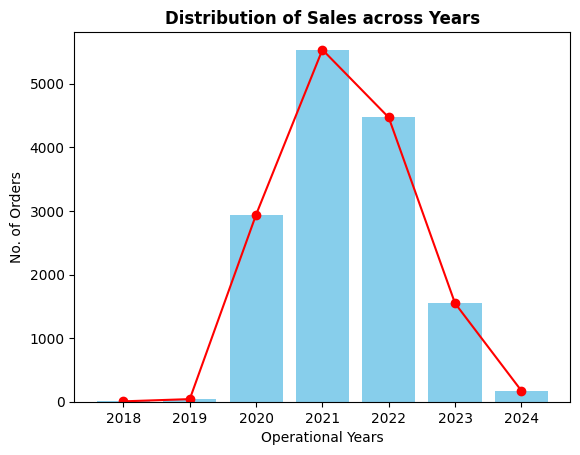

In [ ]:
plt.bar(year_dist.index,year_dist.values,color='skyblue')
plt.plot(year_dist.index,year_dist.values, '-o', color='red')
plt.ylabel('No. of Orders')
plt.xlabel('Operational Years')
plt.title("Distribution of Sales across Years",fontsize='large',fontweight='bold')
plt.show()

## Attribute to winter
The seasons are defined as spring (March, April, May), summer (June, July, August), autumn (September, October, November) and winter (December, January, February)

In [ ]:
mint_orders['Order_Month'].value_counts().index

Index(['May', 'June', 'July', 'April', 'December', 'November', 'August',
       'October', 'September', 'January', 'February', 'March'],
      dtype='object', name='Order_Month')

In [ ]:
month_dist=mint_orders['Order_Month'].value_counts()
new_order = ['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December']
month_dist = month_dist.reindex(new_order, axis=0)

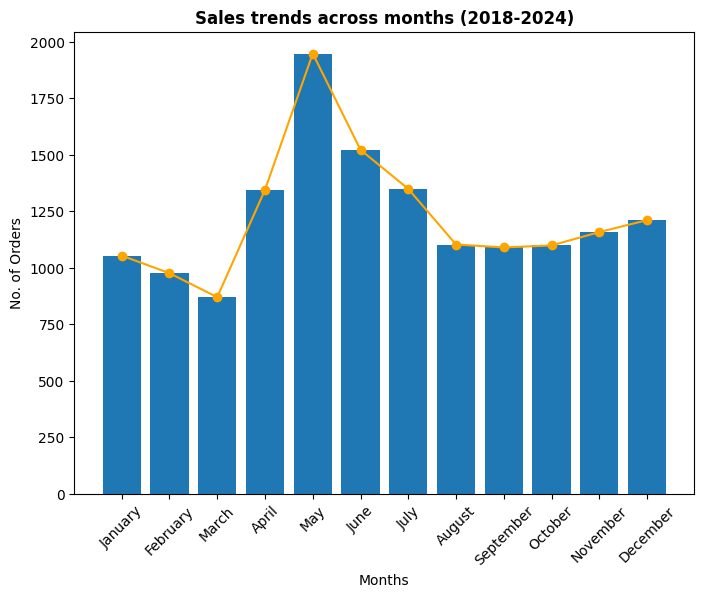

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(month_dist.index,month_dist.values)
plt.plot(month_dist.index,month_dist.values, '-o', color='orange')
plt.ylabel('No. of Orders')
plt.xlabel('Months')
plt.title("Sales trends across months (2018-2024)",fontweight='bold',size='large')
plt.xticks(rotation=45)

plt.show()

In [ ]:
month_dist.values.sum()

14713

In [ ]:
#Peak sales years of 2020-2023
mint_2020=mint_orders[mint_orders['Order_Year']==2020]['Order_Month'].value_counts()
mint_2020 = mint_2020.reindex(new_order, axis=0)

mint_2021=mint_orders[mint_orders['Order_Year']==2021]['Order_Month'].value_counts()
mint_2021 = mint_2021.reindex(new_order, axis=0)

mint_2022=mint_orders[mint_orders['Order_Year']==2022]['Order_Month'].value_counts()
mint_2022 = mint_2022.reindex(new_order, axis=0)

mint_2023=mint_orders[mint_orders['Order_Year']==2023]['Order_Month'].value_counts()
mint_2023 = mint_2023.reindex(new_order, axis=0)



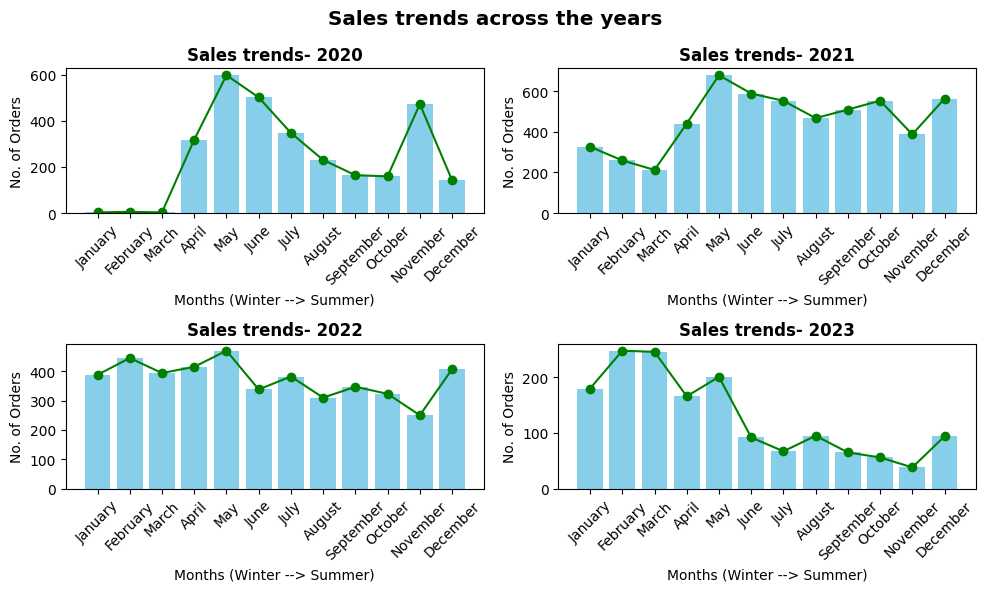

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(mint_2020.index,mint_2020.values,color='skyblue')
plt.plot(mint_2020.index,mint_2020.values, '-o', color='green')
plt.ylabel('No. of Orders')
plt.xlabel('Months (Winter --> Summer)')
plt.title("Sales trends- 2020",fontweight='bold',size='large')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(mint_2021.index,mint_2021.values,color='skyblue')
plt.plot(mint_2021.index,mint_2021.values, '-o', color='green')
plt.ylabel('No. of Orders')
plt.xlabel('Months (Winter --> Summer)')
plt.title("Sales trends- 2021",fontweight='bold',size='large')
plt.xticks(rotation=45)


plt.subplot(2, 2, 3)
plt.bar(mint_2022.index,mint_2022.values,color='skyblue')
plt.plot(mint_2022.index,mint_2022.values, '-o', color='green')
plt.ylabel('No. of Orders')
plt.xlabel('Months (Winter --> Summer)')
plt.title("Sales trends- 2022",fontweight='bold',size='large')
plt.xticks(rotation=45)


plt.subplot(2, 2, 4)
plt.bar(mint_2023.index,mint_2023.values,color='skyblue')
plt.plot(mint_2023.index,mint_2023.values, '-o', color='green')
plt.title("Sales trends- 2023",fontweight='bold',size='large')
plt.xticks(rotation=45)


plt.ylabel('No. of Orders')
plt.xlabel('Months (Winter --> Summer)')


plt.suptitle("Sales trends across the years",fontweight='bold',size='x-large')

plt.tight_layout()
plt.show()



In [ ]:
revenue_by_year = mint_orders.groupby('Order_Year')['Total'].sum()

revenue_by_year.index

Index([2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int32', name='Order_Year')

In [ ]:
mint_retail=mint_orders[mint_orders['Full Address']=='No Address, Retail Order']

In [ ]:
mint_retail.shape

(6646, 50)

In [ ]:
mint_online=mint_orders[~(mint_orders['Full Address']=='No Address, Retail Order')]

In [ ]:
mint_online.shape

(8067, 50)

<ipython-input-70-edaf974489ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mint_online['Hour']=mint_online['Paid at'].dt.hour


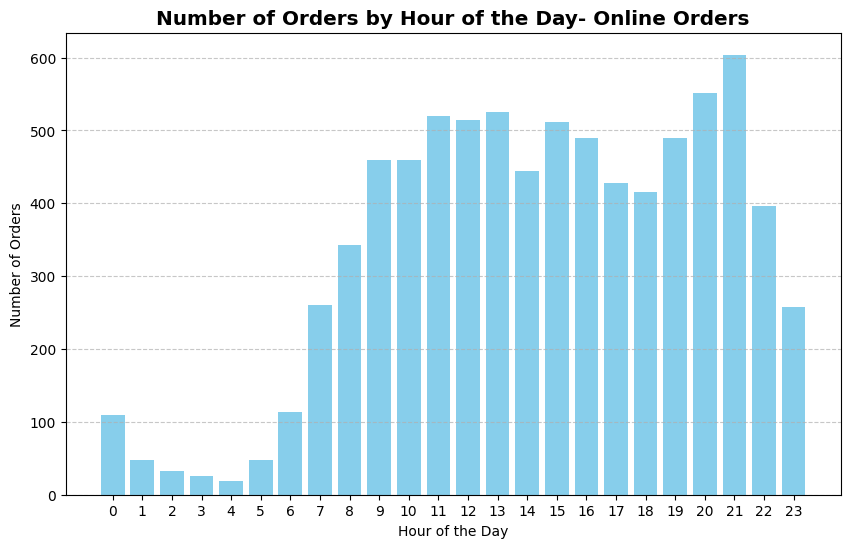

In [ ]:
#Peak times of the day
mint_online['Hour']=mint_online['Paid at'].dt.hour
orders_by_hour = mint_online.groupby('Hour').size()


plt.figure(figsize=(10, 6))
plt.bar(orders_by_hour.index, orders_by_hour.values, color='skyblue')
plt.title('Number of Orders by Hour of the Day- Online Orders',fontweight='bold',size='x-large')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Geographical Analysis

In [ ]:
!pip install pgeocode
import folium
from folium.plugins import HeatMap
from pgeocode import Nominatim

In [ ]:
mint_orders2['Shipping Zip'].isnull().sum()

7313

In [ ]:
mint_orders2['Billing Zip'].isnull().sum()

6677

In [ ]:
import re
zips = pd.DataFrame()

zips['Zip'] = mint_orders2.apply(lambda row: row['Shipping Zip'] if pd.notnull(row['Shipping Zip']) else row['Billing Zip'], axis=1).astype(str).str.strip()

#zips['Zip'] = mint_orders2['Shipping Zip'].dropna().astype(str).str.strip()


#zips['Zip'] = mint_orders2['Shipping Zip'].str.replace(r'\s{2,}', ' ')


def is_valid_uk_postcode(postcode):
    uk_postcode_regex = r'^[A-Z]{1,2}[0-9R][0-9A-Z]? [0-9][ABD-HJLNP-UW-Z]{2}$'
    return re.match(uk_postcode_regex, postcode) is not None


zips['Is_Valid_UK_Postcode'] = zips['Zip'].apply(is_valid_uk_postcode)
zips = zips[zips['Is_Valid_UK_Postcode'] == True]



geo = Nominatim('GB')

zips['latitude'] = zips['Zip'].apply(geo.query_postal_code)['latitude']
zips['longitude'] = zips['Zip'].apply(geo.query_postal_code)['longitude']


zips = zips.dropna(subset=['latitude', 'longitude'])


# Convert the 'latitude' and 'longitude' columns to tuples
zips['Coordinates'] = zips[['latitude', 'longitude']].apply(tuple, axis=1)

# Creating a map
m = folium.Map(location=[51.4545, -2.5879], zoom_start=13)  # Using Bristol's coordinates as the initial location

# Adding a heatmap
HeatMap(data=zips['Coordinates'].tolist(), radius=15).add_to(m)

#m



In [ ]:
zips.shape

In [ ]:
from folium.plugins import MarkerCluster
m = folium.Map(location=[54.7023545, -3.2765753], zoom_start=6)


marker_cluster = MarkerCluster().add_to(m)


for index, row in zips.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['Zip']
    ).add_to(marker_cluster)


m


In [ ]:
#m.save("interactive_map.html")

In [ ]:
#zips['Zip'].value_counts()

#Customer Segmentation

##Customer LIfetime

In [ ]:
customers.columns

Index(['Customer ID', 'Accepts Email Marketing', 'Default Address Address1',
       'Default Address Address2', 'Default Address City', 'Province',
       'Default Address Country Code', 'Default Address Zip',
       'Accepts SMS Marketing', 'Total Spent', 'Total Orders', 'Tags',
       'Full Address'],
      dtype='object')

In [ ]:
customer_lifetime= merged_orders.groupby('Customer ID')['Paid at'].agg(['min', 'max'])
customer_lifetime.reset_index(inplace=True)

In [ ]:
customer_lifetime.shape

(4036, 3)

In [ ]:
customer_lifetime[customer_lifetime['Customer ID']=='1167240495215']

Customer ID                        min                        max
6  1167240495215  2019-03-07 22:10:26 +0000  2022-09-26 17:20:53 +0100

In [ ]:
day_of_data = pd.to_datetime('2024-02-09')

In [ ]:
customer_lifetime['min'] = pd.to_datetime(customer_lifetime['min'],utc=True)

customer_lifetime['max'] = pd.to_datetime(customer_lifetime['max'],utc=True)

customer_lifetime['Lifetime'] = customer_lifetime['max'].dt.date - customer_lifetime['min'].dt.date

customer_lifetime['Lifetime'] = customer_lifetime['Lifetime'].apply(lambda x: x.days)

customer_lifetime['Days Since Last Order'] = day_of_data.date() - customer_lifetime['max'].dt.date

customer_lifetime['Days Since Last Order'] = customer_lifetime['Days Since Last Order'].apply(lambda x: x.days)

In [ ]:
customer_lifetime['Lifetime'].head()

0    296
1      0
2      0
3      0
4    157
Name: Lifetime, dtype: int64

In [ ]:
merged_customer_lifetime = customer_lifetime.merge(customers, how='left', on='Customer ID')


total_spend = merged_orders.groupby('Customer ID')['Total'].sum().reset_index()
total_orders = merged_orders['Customer ID'].value_counts().reset_index()
total_orders.columns = ['Customer ID', 'Total Orders (Calc.)']

merged_customer_lifetime = merged_customer_lifetime.merge(total_spend, how='left', on='Customer ID')
merged_customer_lifetime = merged_customer_lifetime.merge(total_orders, how='left', on='Customer ID')


In [ ]:
merged_customer_lifetime.drop(columns=['Default Address Address1',
       'Default Address Address2', 'Default Address City', 'Province',
       'Default Address Country Code', 'Default Address Zip',
       'Accepts SMS Marketing'],inplace=True)

In [ ]:
merged_customer_lifetime.head()

Customer ID                       min                       max  \
0       1.17E+12 2020-05-28 19:55:32+00:00 2021-03-20 12:58:31+00:00   
1  1007169863791 2018-12-13 22:06:38+00:00 2018-12-13 22:06:38+00:00   
2  1010348556399 2018-12-15 11:07:11+00:00 2018-12-15 11:07:11+00:00   
3  1166631436399 2019-03-07 14:56:34+00:00 2019-03-07 23:12:55+00:00   
4  1167175286895 2022-08-18 07:27:56+00:00 2023-01-22 18:49:20+00:00   

   Lifetime  Days Since Last Order Accepts Email Marketing  Total Spent  \
0       296                   1056                     yes       221.80   
1         0                   1884                     yes         9.00   
2         0                   1882                     yes        26.00   
3         0                   1800                     yes       105.00   
4       157                    383                     yes       764.45   

   Total Orders                         Tags  \
0           6.0              Local Customers   
1           1.0              Local Customers   
2           1.0              Local Customers   
3           2.0  Local Customers, newsletter   
4          24.0              Local Customers   

                                        Full Address   Total  \
0  14 boundary close,kingswood,wotton under edge,...  133.80   
1              15 westfields,gloucestershire,gl127aj    9.00   
2   18 knapp road,synwell,wotton under edge,gl12 7hb   26.00   
3         12 wortley road,wotton under edge,gl12 7ju  105.00   
4                   8 gascoigne close,london,n17 8ba  152.74   

   Total Orders (Calc.)  
0                     4  
1                     1  
2                     1  
3                     2  
4                     2

In [ ]:
merged_customer_lifetime.shape

(4036, 12)

## RFM Segmentation Model

In [ ]:
merged_customer_lifetime.columns

Index(['Customer ID', 'min', 'max', 'Lifetime', 'Days Since Last Order',
       'Accepts Email Marketing', 'Total Spent', 'Total Orders', 'Tags',
       'Full Address', 'Total', 'Total Orders (Calc.)'],
      dtype='object')

In [ ]:
import seaborn as sns

In [ ]:
zero_count_orders = merged_customer_lifetime[merged_customer_lifetime['Total Orders'] == 0]

zero_spent_orders=merged_customer_lifetime[merged_customer_lifetime['Total Spent'] == 0]

merged_customer_lifetime.loc[zero_count_orders.index, 'Total Orders'] = zero_count_orders['Total Orders (Calc.)']
merged_customer_lifetime.loc[zero_spent_orders.index, 'Total Spent'] = zero_spent_orders['Total']

In [ ]:
merged_customer_lifetime=merged_customer_lifetime[(merged_customer_lifetime['Total Orders']>0) & (merged_customer_lifetime['Total Spent']>0)]

In [ ]:
merged_customer_lifetime.shape

(4006, 12)

In [ ]:
rfm_data = merged_customer_lifetime[['Customer ID', 'Days Since Last Order', 'Total Orders', 'Total Spent']].copy()
rfm_data['Days Since Last Order']=rfm_data['Days Since Last Order'].astype(int)
rfm_data['Total Orders']=rfm_data['Total Orders'].astype(int)
rfm_data['Total Spent']=rfm_data['Total Spent'].astype(float)

In [ ]:
recency_bins = [rfm_data['Days Since Last Order'].min()-1, 400, 800, 1200, rfm_data['Days Since Last Order'].max()]
frequency_bins = [rfm_data['Total Orders'].min() - 1, 2, 4, 6, rfm_data['Total Orders'].max()]
monetary_bins = [rfm_data['Total Spent'].min() - 1, 50, 100,200,rfm_data['Total Spent'].max()]

In [ ]:
rfm_data['R_Score'] = pd.cut(rfm_data['Days Since Last Order'], bins=recency_bins, labels=range(1, 5), include_lowest=True)

rfm_data['R_Score'] = 5 - rfm_data['R_Score'].astype(int) + 1

rfm_data['F_Score'] = pd.cut(rfm_data['Total Orders'], bins=frequency_bins, labels=range(1, 5), include_lowest=True).astype(int)
rfm_data['M_Score'] = pd.cut(rfm_data['Total Spent'], bins=monetary_bins, labels=range(1, 5), include_lowest=True).astype(int)

In [ ]:
rfm_data.head()

Customer ID  Days Since Last Order  Total Orders  Total Spent  R_Score  \
0       1.17E+12                   1056             6       221.80        3   
1  1007169863791                   1884             1         9.00        2   
2  1010348556399                   1882             1        26.00        2   
3  1166631436399                   1800             2       105.00        2   
4  1167175286895                    383            24       764.45        5   

   F_Score  M_Score  
0        3        4  
1        1        1  
2        1        1  
3        1        3  
4        4        4

In [ ]:
np.random.seed(42)

## K-Means Clustering

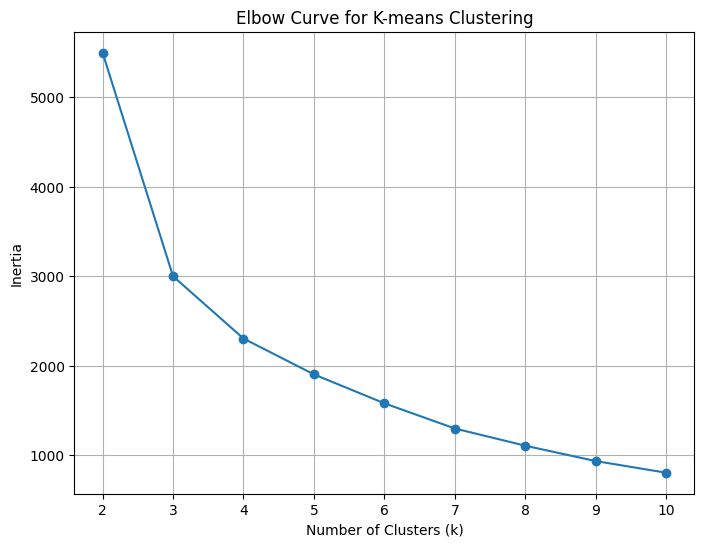

In [ ]:
#Clustering
from sklearn.cluster import KMeans
X = rfm_data[['R_Score', 'F_Score', 'M_Score']]
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

In [ ]:
best_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm_data['Cluster'] = best_kmeans.fit_predict(X)

In [ ]:
cluster_names = {
    0: 'Need Attention',
    1: 'Champion Shoppers',
    2: 'New Customers',
    3: 'Potential Loyalists'
}

colors = ['darkred','lightgreen','#f39c12','lightblue']

rfm_data['Cluster'] = rfm_data['Cluster'].map(cluster_names)

label_color_map = {label: color for label, color in zip(cluster_names.values(), colors)}

In [ ]:
rfm_data.head()

Customer ID  Days Since Last Order  Total Orders  Total Spent  R_Score  \
0       1.17E+12                   1056             6       221.80        3   
1  1007169863791                   1884             1         9.00        2   
2  1010348556399                   1882             1        26.00        2   
3  1166631436399                   1800             2       105.00        2   
4  1167175286895                    383            24       764.45        5   

   F_Score  M_Score              Cluster  
0        3        4    Champion Shoppers  
1        1        1       Need Attention  
2        1        1       Need Attention  
3        1        3  Potential Loyalists  
4        4        4    Champion Shoppers

In [ ]:
cluster_summary = rfm_data.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'
}).reset_index()

In [ ]:
print(cluster_summary)

               Cluster   R_Score   F_Score   M_Score
0    Champion Shoppers  4.092697  3.053371  3.449438
1       Need Attention  2.610398  1.018349  1.000000
2        New Customers  4.399690  1.079009  1.271108
3  Potential Loyalists  2.729282  1.314917  2.288674


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, rfm_data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5296855594591389


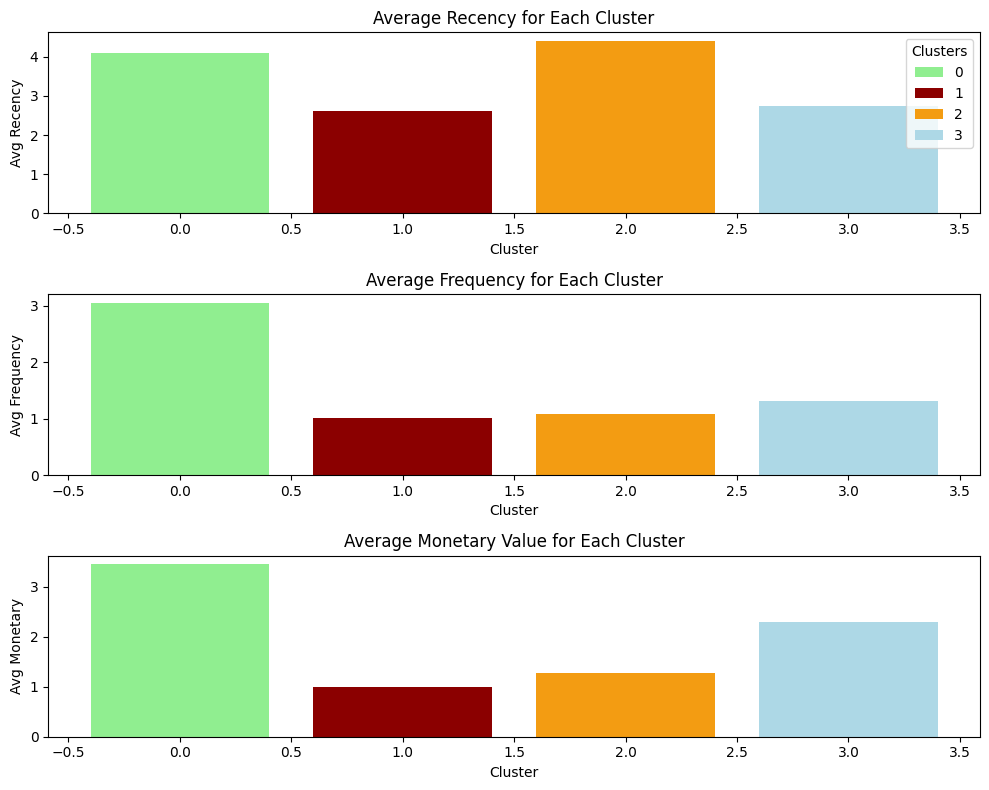

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['R_Score'], color=[label_color_map[label] for label in cluster_summary['Cluster']])
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')

plt.legend(bars, cluster_summary.index, title='Clusters')

plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['F_Score'], color=[label_color_map[label] for label in cluster_summary['Cluster']])
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')

#plt.legend(bars, cluster_summary.index, title='Clusters')

plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['M_Score'], color=[label_color_map[label] for label in cluster_summary['Cluster']])
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')

#plt.legend(bars, cluster_summary.index, title='Clusters')

plt.tight_layout()
plt.show()

In [ ]:
rfm_data['Cluster'].value_counts().sort_index()

Cluster
Champion Shoppers       356
Need Attention         1635
New Customers          1291
Potential Loyalists     724
Name: count, dtype: int64

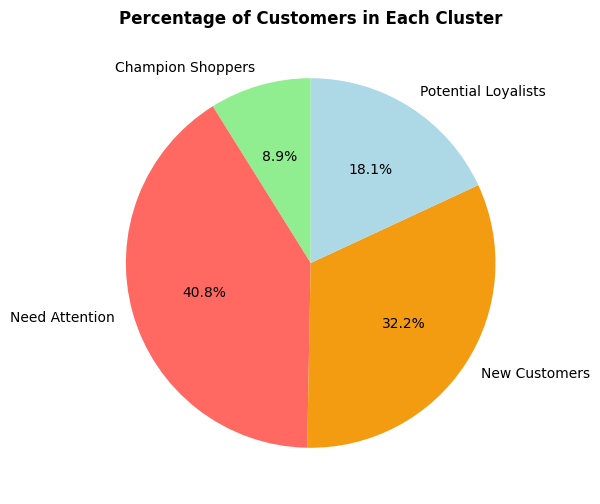

In [ ]:
cluster_counts = rfm_data['Cluster'].value_counts().sort_index()

total_customers = cluster_counts.sum()

cluster_colors = {

    'Champion Shoppers': 'lightgreen',
    'Need Attention': '#ff6961',
    'New Customers': '#f39c12',
    'Potential Loyalists': 'lightblue',
}

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

colors=cluster_colors.values()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentage_customers, labels=cluster_colors.keys(), autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster',fontweight='bold',size='large')


plt.show()

In [ ]:
rfm_data.to_csv("Clustered_Customers.csv", encoding='utf-8', index=False)

In [ ]:
rfm_data.head(20)

Customer ID  Days Since Last Order  Total Orders  Total Spent  R_Score  \
0        1.17E+12                   1056             6       221.80        3   
1   1007169863791                   1884             1         9.00        2   
2   1010348556399                   1882             1        26.00        2   
3   1166631436399                   1800             2       105.00        2   
4   1167175286895                    383            24       764.45        5   
5   1167201632367                   1323            11       289.50        2   
6   1167240495215                    501             4       114.00        4   
7   1169664114799                   1744             2        70.00        2   
8   1169994973295                    893             1        14.00        3   
9   1172793163887                   1796             1        35.00        2   
10  1174943170671                   1381             2        48.00        2   
11  1175876862063                   1794             1         5.00        2   
12  1183284461679                   1565             3       105.00        2   
13  1184150388847                    960             1        28.80        3   
14  1196831375471                   1784             1         5.00        2   
15  1198010040431                     21            19       604.00        5   
16  1198756397167                   1783             1        35.00        2   
17  1202255102063                   1780             1        35.00        2   
18  1209618694255                   1370             2        18.00        2   
19  1236178600047                   1759             3       140.00        2   

    F_Score  M_Score              Cluster  
0         3        4    Champion Shoppers  
1         1        1       Need Attention  
2         1        1       Need Attention  
3         1        3  Potential Loyalists  
4         4        4    Champion Shoppers  
5         4        4    Champion Shoppers  
6         2        3    Champion Shoppers  
7         1        2  Potential Loyalists  
8         1        1       Need Attention  
9         1        1       Need Attention  
10        1        1       Need Attention  
11        1        1       Need Attention  
12        2        3  Potential Loyalists  
13        1        1       Need Attention  
14        1        1       Need Attention  
15        4        4    Champion Shoppers  
16        1        1       Need Attention  
17        1        1       Need Attention  
18        1        1       Need Attention  
19        2        3  Potential Loyalists

# How much has each cluster contributed?

In [ ]:
cluster_spending = rfm_data.groupby('Cluster')['Total Spent'].sum()

In [ ]:
cluster_spending

Cluster
Champion Shoppers      92151.18
Need Attention         42058.35
New Customers          48363.72
Potential Loyalists    63014.92
Name: Total Spent, dtype: float64

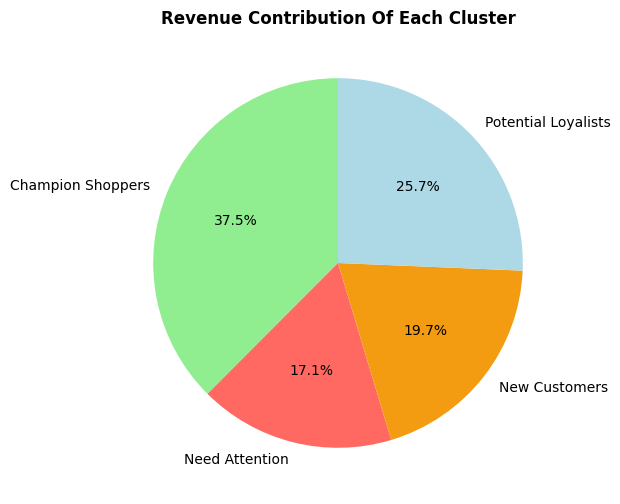

In [ ]:
cluster_colors = {

    'Champion Shoppers': 'lightgreen',
    'Need Attention': '#ff6961',
    'New Customers': '#f39c12',
    'Potential Loyalists': 'lightblue',
}
plt.figure(figsize=(8, 6))
plt.pie(cluster_spending, labels=cluster_colors.keys(), autopct='%1.1f%%', startangle=90, colors=cluster_colors.values())
plt.title('Revenue Contribution Of Each Cluster', fontweight='bold', size='large')

plt.show()

#Product Level Analysis


In [ ]:
mint_orders['Lineitem name'] = mint_orders['Lineitem name'].astype(str)
mint_orders['Lineitem name']

0                             Euphorbia coerulescens (080)
1                                         £5 Rescue Cactus
2                                    Senecio serpens (566)
7                                  £2 Plant Box - 5 plants
9        SUNDRIES BY SCOOP: Cactus & Succulent Compost ...
                               ...                        
39063                        Echeveria in Ceramic Pot 13cm
39064    Christmas Wreath Workshop - Saturday 1st Decem...
39065                                Scilla Violacea 8.5cm
39067                                Scilla Violacea 8.5cm
39069                           Philodendron Scandens 10cm
Name: Lineitem name, Length: 14713, dtype: object

In [ ]:
#Cleaning
import re
mint_orders['Itemname'] = mint_orders['Lineitem name'].apply(lambda x: x.lower() if 'workshop' in x.lower() else x)

mint_orders['Itemname'] = mint_orders['Itemname'].str.replace(r'\s*\d+-\d+cm\s+.*$', '', regex=True).str.strip()
mint_orders['Itemname'] = mint_orders['Itemname'].str.replace(r'\d+|cm', '', regex=True)

mint_orders['Itemname'] = mint_orders['Itemname'].str.replace(r'\(.*\)', '', regex=True).str.strip()

mint_orders['Itemname'] = mint_orders['Itemname'].str.replace(r"£\d+", '', regex=True).str.strip() # remove price
mint_orders['Itemname'] = mint_orders['Itemname'].str.replace(r'!.*', '', regex=True).str.strip() # Delete ! and characters after it
mint_orders['Itemname'] = mint_orders['Itemname'].str.replace(r'@.*', '', regex=True).str.strip() # Delete @ and characters after it
mint_orders['Itemname']  = mint_orders['Itemname'] .str.replace(r'^[^:]*:\s*', '', regex=True).str.strip() # delete : and character before
mint_orders['Itemname'] = mint_orders['Itemname'].str.replace(r'\b[A-Z]+\b', '', regex=True).str.strip() # Delete words with all capital letters
mint_orders['Itemname'] = mint_orders['Itemname'].str.replace(r'\d+L.*', '', regex=True).str.strip() # delete like 2L and characters after it
mint_orders['Itemname'] = mint_orders['Itemname'].apply(lambda x: re.sub(r'[/\'"].*', '', x).strip())# delete /,'," and characters after it

mint_orders['Itemname'] = mint_orders['Itemname'].str.split(' - ').str[0] #delete - and characters after it
mint_orders['Itemname'] = mint_orders['Itemname'].str.replace(r'[-.%*,£]', '', regex=True).str.strip()
mint_orders['Itemname'] = mint_orders['Itemname'].str.replace('Scoop', '', case=False).str.strip()


In [ ]:
#Analysis columns
mint_prods=mint_orders[mint_orders['Itemname'] != 'The'][['Lineitem name','Itemname','Order_Year', 'Order_Month','Shipping Zip']]
mint_prods = mint_prods.loc[mint_orders['Itemname'] != '']

In [ ]:
def map_seasons(month):
  if month in ['March','April','May']:
    return 'Spring'
  if month in ['June', 'July', 'August']:
    return 'Summer'
  if month in ['September', 'October', 'November']:
    return 'Autumn'
  if month in ['December', 'January', 'February']:
    return 'Winter'

In [ ]:
mint_prods['Season'] = mint_prods['Order_Month'].apply(map_seasons)

In [ ]:
mint_prods

Lineitem name  \
0                           Euphorbia coerulescens (080)   
1                                       £5 Rescue Cactus   
2                                  Senecio serpens (566)   
7                                £2 Plant Box - 5 plants   
9      SUNDRIES BY SCOOP: Cactus & Succulent Compost ...   
...                                                  ...   
39063                      Echeveria in Ceramic Pot 13cm   
39064  Christmas Wreath Workshop - Saturday 1st Decem...   
39065                              Scilla Violacea 8.5cm   
39067                              Scilla Violacea 8.5cm   
39069                         Philodendron Scandens 10cm   

                         Itemname  Order_Year Order_Month Shipping Zip  Season  
0          Euphorbia coerulescens        2024    February     ta21 8nh  Winter  
1                   Rescue Cactus        2024    February     nr31 6hj  Winter  
2                 Senecio serpens        2024    February      po8 9sa  Winter  
7                       Plant Box        2024    February      m34 7tw  Winter  
9      Cactus & Succulent Compost        2024    February      bs8 1ax  Winter  
...                           ...         ...         ...          ...     ...  
39063    Echeveria in Ceramic Pot        2018    December      gl127aj  Winter  
39064   christmas wreath workshop        2018    November          NaN  Autumn  
39065             Scilla Violacea        2018    November      bs8 2xe  Autumn  
39067             Scilla Violacea        2018    November      bs8 2xe  Autumn  
39069       Philodendron Scandens        2018    November      bs7 9lh  Autumn  

[14669 rows x 6 columns]

In [ ]:
seasonal_orders = mint_prods.groupby(['Season', 'Itemname']).size().reset_index(name='Order_Count')

seasonal_orders_sorted = seasonal_orders.sort_values(by=['Season', 'Order_Count'], ascending=[True, False])

top_5_in_each_season = seasonal_orders_sorted.groupby('Season').head(5)



In [ ]:
aut=top_5_in_each_season[top_5_in_each_season['Season']=='Autumn']
spr=top_5_in_each_season[top_5_in_each_season['Season']=='Spring']
sum=top_5_in_each_season[top_5_in_each_season['Season']=='Summer']
win=top_5_in_each_season[top_5_in_each_season['Season']=='Winter']

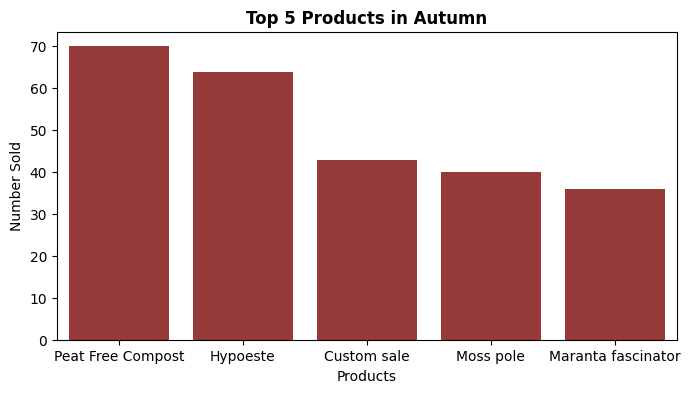

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Itemname',y='Order_Count',data=aut,color='brown')
plt.xlabel('Products')
plt.ylabel('Number Sold')
plt.title('Top 5 Products in Autumn',fontweight='bold',size='large')
plt.show()

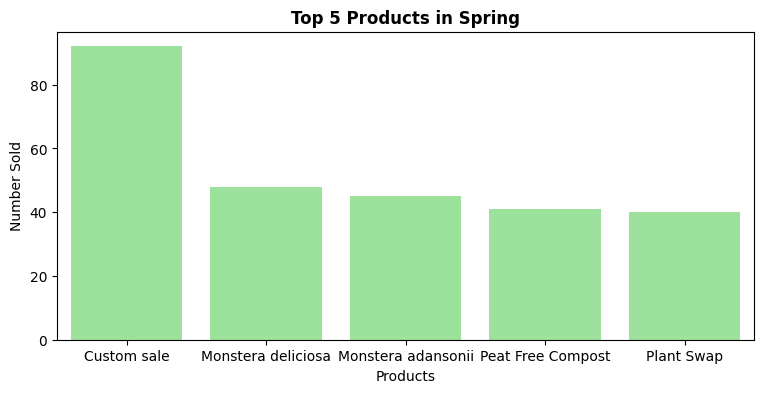

In [ ]:
plt.figure(figsize=(9,4))
sns.barplot(x='Itemname',y='Order_Count',data=spr,color='lightgreen')
plt.xlabel('Products')
plt.ylabel('Number Sold')
plt.title('Top 5 Products in Spring',fontweight='bold',size='large')
plt.show()

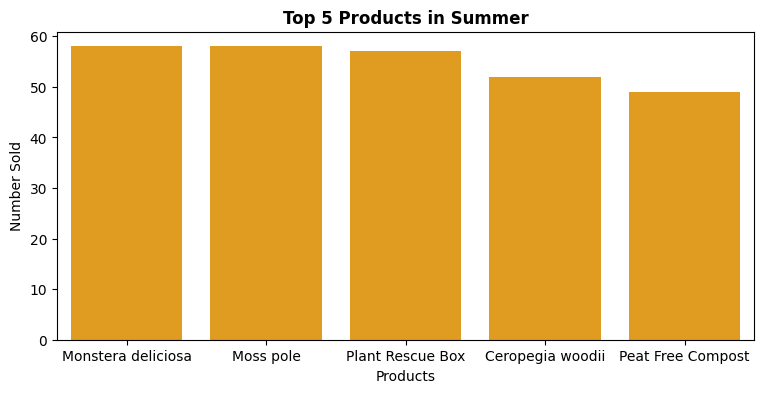

In [ ]:
plt.figure(figsize=(9,4))
sns.barplot(x='Itemname',y='Order_Count',data=sum,color='Orange')
plt.xlabel('Products')
plt.ylabel('Number Sold')
plt.title('Top 5 Products in Summer',fontweight='bold',size='large')
plt.show()

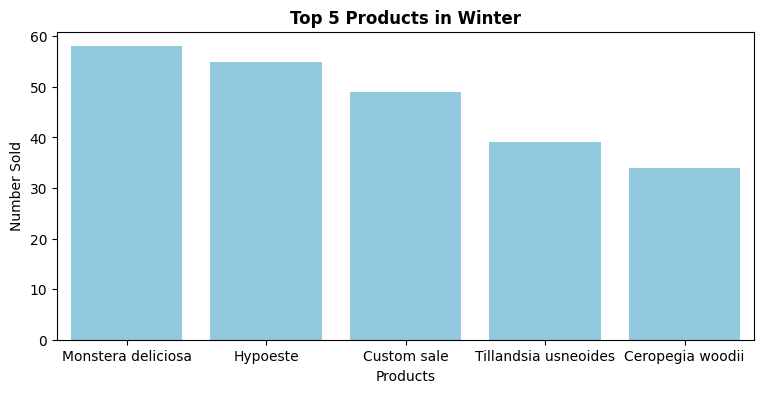

In [ ]:
plt.figure(figsize=(9,4))
sns.barplot(x='Itemname',y='Order_Count',data=win,color='skyblue')
plt.xlabel('Products')
plt.ylabel('Number Sold')
plt.title('Top 5 Products in Winter',fontweight='bold',size='large')
plt.show()